# CPSC 483 Introduction to Machine Learning
## Project 1: Boston Dataset
## William Timani
### williamtimani@csu.fullerton.edu
## Josef Jankowski
### josefj1519@csu.fullerton.edu

### 1. Load and examine the Boston dataset's features, target values, and description

In [1]:
from sklearn import datasets
dataset_boston = datasets.load_boston()

#Dataset Description 
print(dataset_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
import pandas as pd

#Independent variables (i.e. features)
df_boston_features = pd.DataFrame(data=dataset_boston.data, columns=dataset_boston.feature_names)
df_boston_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
#Dependent variables (i.e. targets)
df_boston_target = pd.DataFrame(data=dataset_boston.target, columns=['MEDV'])
df_boston_target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 2. Create a scatterplot showing the relationship between the feature LSTAT and the target value MEDV. Does the relationship appear to be linear?

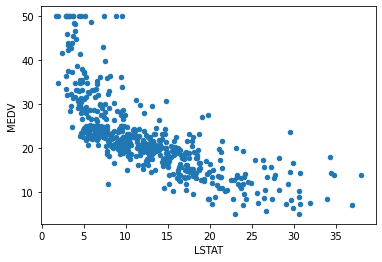

In [4]:
df_boston_LSTAT_MEDV = pd.DataFrame(data=df_boston_features['LSTAT'], columns=['LSTAT'])
df_boston_LSTAT_MEDV['MEDV'] = df_boston_target['MEDV']
df_boston_LSTAT_MEDV.plot.scatter(x='LSTAT', y='MEDV')

<span style="font-size:1.2em;"> The data is mostly linear, with some outliers appearing when LSTAT is below 10.

### 3. Create and fit() an sklearn.linear_model.LinearRegression model using LSTAT as a predictor of MEDV. Using the coef_ and intercept_ attributes of the model, what is the equation for MEDV as a function of LSTAT?

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array(df_boston_LSTAT_MEDV['LSTAT']).reshape([-1,1])
y = np.array(df_boston_LSTAT_MEDV['MEDV'])
reg = LinearRegression().fit(x, y)
print('Coeffecient:', reg.coef_)
print('Intercept:', reg.intercept_)

Coeffecient: [-0.95004935]
Intercept: 34.55384087938311


<span style="font-size:1.2em;">MEDV = 34.55 - 0.95LSTAT

### 4. Use the predict() method of the model to find the response for eafch value of the LSTAT attribute in the dataset. Using sklearn.meterics.mean_squared_error(), find trhe average loss 𝓛 for the model.

In [6]:
predictedMEDV = reg.predict(x)

from sklearn.metrics import mean_squared_error
avg_loss = mean_squared_error(x, predictedMEDV, squared=False)
print('LSTAT Average Loss:', avg_loss)

LSTAT Average Loss: 17.06292694852611


### 5. Add a line to your scatter plot representing the least squares fit to the data. How well does the model fit the data?

Text(0, 0.5, 'MEDV')

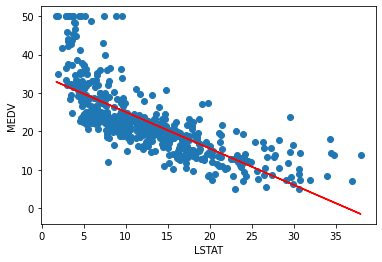

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df_boston_LSTAT_MEDV['LSTAT'], df_boston_LSTAT_MEDV['MEDV'])
plt.plot(x, predictedMEDV, color='red')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

<span style="font-size:1.2em;">The model fits the data well, with exception to the outliers when LSTAT is < 10

### 6. Now repeat experiments (3) and (4) using all 13 input features. How does the average loss change?

In [8]:
for feature in df_boston_features :
    print(feature)
    x = np.array(df_boston_features[feature]).reshape([-1,1])
    reg = LinearRegression().fit(x, y)
    print('Coeffecient:', reg.coef_)
    print('Intercept:', reg.intercept_)
    
    predictedMEDV = reg.predict(x)

    avg_loss = mean_squared_error(x, predictedMEDV, squared=False)
    print('Average Loss:', avg_loss, '\n')

CRIM
Coeffecient: [-0.41519028]
Intercept: 24.03310617412388
Average Loss: 22.49053221359474 

ZN
Coeffecient: [0.14213999]
Intercept: 20.917579117799832
Average Loss: 22.896622020566163 

INDUS
Coeffecient: [-0.64849005]
Intercept: 29.75489651192849
Average Loss: 16.0472807929893 

CHAS
Coeffecient: [6.34615711]
Intercept: 22.093842887473464
Average Loss: 22.504559215532918 

NOX
Coeffecient: [-33.91605501]
Intercept: 41.34587446797325
Average Loss: 22.34670151236455 

RM
Coeffecient: [9.10210898]
Intercept: -34.67062077643857
Average Loss: 17.214693136508902 

AGE
Coeffecient: [-0.12316272]
Intercept: 30.97867776261804
Average Loss: 55.83417280718952 

DIS
Coeffecient: [1.09161302]
Intercept: 18.390088330493388
Average Loss: 18.73875468086449 

RAD
Coeffecient: [-0.4030954]
Intercept: 26.382128362272397
Average Loss: 17.819416131885543 

TAX
Coeffecient: [-0.0255681]
Intercept: 32.9706544936663
Average Loss: 422.5927598401647 

PTRATIO
Coeffecient: [-2.1571753]
Intercept: 62.34462747

<span style="font-size:1.2em;"> Most average loss is consistently between 15-22 with exception of TAX and B which are much higher at 422 and 345. </span>

### 7. Based on the coef_ attributes of the new model, which features are desirable in a home? Which features detract from its value?

<span style="font-size:1.2em;">ZN, CHAS, RM, DIS, B are features that are desirable since their coef_attribute is positive, indicating that an increase in the feature will increase the value of the home. CRIM, INDUS, NOX, AGE, RAD, TAX, PTRATIO and LSTAT detract from the value of the home since their coef_attribute is negative, indicating that an increase in the feature will decrease the value of the home. </span>

### 8. Given the coef_ attributes, find the following for each feature: how much does a one unit increase in that feature change the median value of the home? Give your answer in dollars.

In [9]:
for feature in df_boston_features :
    x = np.array(df_boston_features[feature]).reshape([-1,1])
    reg = LinearRegression().fit(x, y)
    print(feature, ': $', (reg.coef_[0] * 1000).round())

CRIM : $ -415.0
ZN : $ 142.0
INDUS : $ -648.0
CHAS : $ 6346.0
NOX : $ -33916.0
RM : $ 9102.0
AGE : $ -123.0
DIS : $ 1092.0
RAD : $ -403.0
TAX : $ -26.0
PTRATIO : $ -2157.0
B : $ 34.0
LSTAT : $ -950.0


### 9. Based on the amount of change in the value of the home, which features don’t seem to be important? 

<span style="font-size:1.2em;">TAX, and B don't seem to be important since a one unit increase in the feature only changes the value of the home by less than 40 dollars.</span>